In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import accuracy_score
from math import sqrt

In [2]:
df = pd.read_csv('metro_pop_change_year_MSA_clean.csv')
df.head()

,CBSA,NAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,10180,"Abilene, TX",165585,166634,167442,167473,168342,169688,170017,170429,171150,172060
1,10420,"Akron, OH",703031,703200,702109,703621,704908,704382,703524,703987,703855,703479
2,10500,"Albany, GA",154145,154545,153976,152667,151949,150387,149137,148090,147840,146726
3,10540,"Albany-Lebanon, OR",116891,118164,118273,118405,119042,120236,122769,125035,127451,129749
4,10580,"Albany-Schenectady-Troy, NY",871082,872778,874698,877065,878113,879085,879792,882158,882263,880381


In [7]:
df0 = df.iloc[2, 2:].values

C:\Users\Joshua\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Joshua\anaconda3\envs\mlenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Joshua\anaconda3\envs\mlenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Joshua\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=149079.176879, expected=149137.000000
predicted=147891.921884, expected=148090.000000
predicted=147386.361247, expected=147840.000000
predicted=147178.617104, expected=146726.000000
Test RMSE: 336.611


C:\Users\Joshua\anaconda3\envs\mlenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


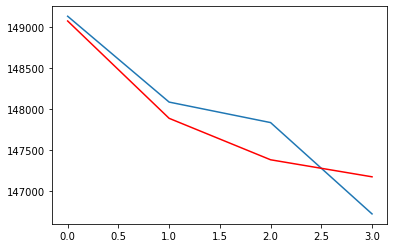

In [8]:
# run a rolling forecast
size = int(len(df0) * 0.66)
train, test = df0[0:size], df0[size:len(df0)]
history = [x for x in train]
predictions = list()
error = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    error.append((yhat-obs)/obs*100)
# evaluate forecasts
Rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % Rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()